In [2]:
from PIL import ImageGrab
import os

screenshot_path = os.path.join(os.getcwd(), 'screenshot', 'screenshot.png')
template_path = os.path.join(os.getcwd(), 'templates', 'box.png')

In [4]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [19]:
'''
def find_template_in_image(imgae_path, template_path):

    image = cv2.imread(imgae_path, cv2.IMREAD_COLOR)
    template = cv2.imread(template_path, cv2.IMREAD_COLOR)

'''

'\ndef find_template_in_image(imgae_path, template_path):\n\n    image = cv2.imread(imgae_path, cv2.IMREAD_COLOR)\n    template = cv2.imread(template_path, cv2.IMREAD_COLOR)\n\n'

In [18]:
def capture_screen():
    screen_np = np.array(ImageGrab.grab())
    return cv2.cvtColor(screen_np, cv2.COLOR_RGB2BGR) #COLOR_RGB2BGR의 2는 숫자가 아닌 'to'에 가까움 -> convert ~ to ~

In [ ]:
def find_template_in_image(imgae_path, template_path):

    image = cv2.imread(imgae_path, cv2.IMREAD_COLOR)
    template = cv2.imread(template_path, cv2.IMREAD_COLOR)

    

In [20]:
import winreg

def find_lol_install_path():
    try:
        # 레지스트리 키 경로
        registry_key_path = r"SOFTWARE\Microsoft\Windows\CurrentVersion\Uninstall\Riot Game valorant.live"

        # 레지스트리 키를 엽니다
        registry_key = winreg.OpenKey(winreg.HKEY_LOCAL_MACHINE, registry_key_path, 0, winreg.KEY_READ)
        
        # 레지스트리 키에서 'InstallLocation' 값을 읽습니다
        install_path, _ = winreg.QueryValueEx(registry_key, "InstallLocation")
        
        # 레지스트리 키를 닫습니다
        winreg.CloseKey(registry_key)
        
        return install_path
    except FileNotFoundError:
        return "리그 오브 레전드가 설치되지 않았거나 레지스트리 정보를 찾을 수 없습니다."

if __name__ == "__main__":
    install_path = find_lol_install_path()
    print(f"리그 오브 레전드 설치 경로: {install_path}")


리그 오브 레전드 설치 경로: 리그 오브 레전드가 설치되지 않았거나 레지스트리 정보를 찾을 수 없습니다.


In [17]:
screen_np = np.array(ImageGrab.grab())


In [11]:
screen_np.shape

(1600, 2560, 3)

In [8]:
screen_cv = cv2.cvtColor(screen_np, cv2.COLOR_RGB2BGR) #COLOR_RGB2BGR의 2는 숫자가 아닌 'to'에 가까움 -> convert ~ to ~

In [10]:
screen_cv.shape

(1600, 2560, 3)

In [12]:
screen_cv == screen_np

array([[[ True,  True,  True],
        [ True,  True,  True],
        [ True,  True,  True],
        ...,
        [ True,  True,  True],
        [ True,  True,  True],
        [ True,  True,  True]],

       [[ True,  True,  True],
        [ True,  True,  True],
        [ True,  True,  True],
        ...,
        [ True,  True,  True],
        [ True,  True,  True],
        [ True,  True,  True]],

       [[ True,  True,  True],
        [ True,  True,  True],
        [ True,  True,  True],
        ...,
        [ True,  True,  True],
        [ True,  True,  True],
        [ True,  True,  True]],

       ...,

       [[False,  True, False],
        [False,  True, False],
        [False,  True, False],
        ...,
        [False,  True, False],
        [False,  True, False],
        [False,  True, False]],

       [[False,  True, False],
        [False,  True, False],
        [False,  True, False],
        ...,
        [False,  True, False],
        [False,  True, False],
        [False,

In [6]:
import cv2
import numpy as np

min_match_count=10


In [7]:
from PIL import ImageGrab
import os

screenshot_path = os.path.join(os.getcwd(), 'screenshot', 'screenshot.png')
template_path = os.path.join(os.getcwd(), 'templates', 'box.png')

In [8]:
print(screenshot_path, '\n', template_path)

c:\Users\crypt\WorkSpace_C\projects_240529~\League-of-Legends-Capsule-Opener\screenshot\screenshot.png 
 c:\Users\crypt\WorkSpace_C\projects_240529~\League-of-Legends-Capsule-Opener\templates\box.png


In [9]:
screen = ImageGrab.grab()
screen_np = np.array(screen)
img = cv2.cvtColor(screen_np, cv2.COLOR_RGB2GRAY) 

template = cv2.imread(template_path, cv2.IMREAD_GRAYSCALE)

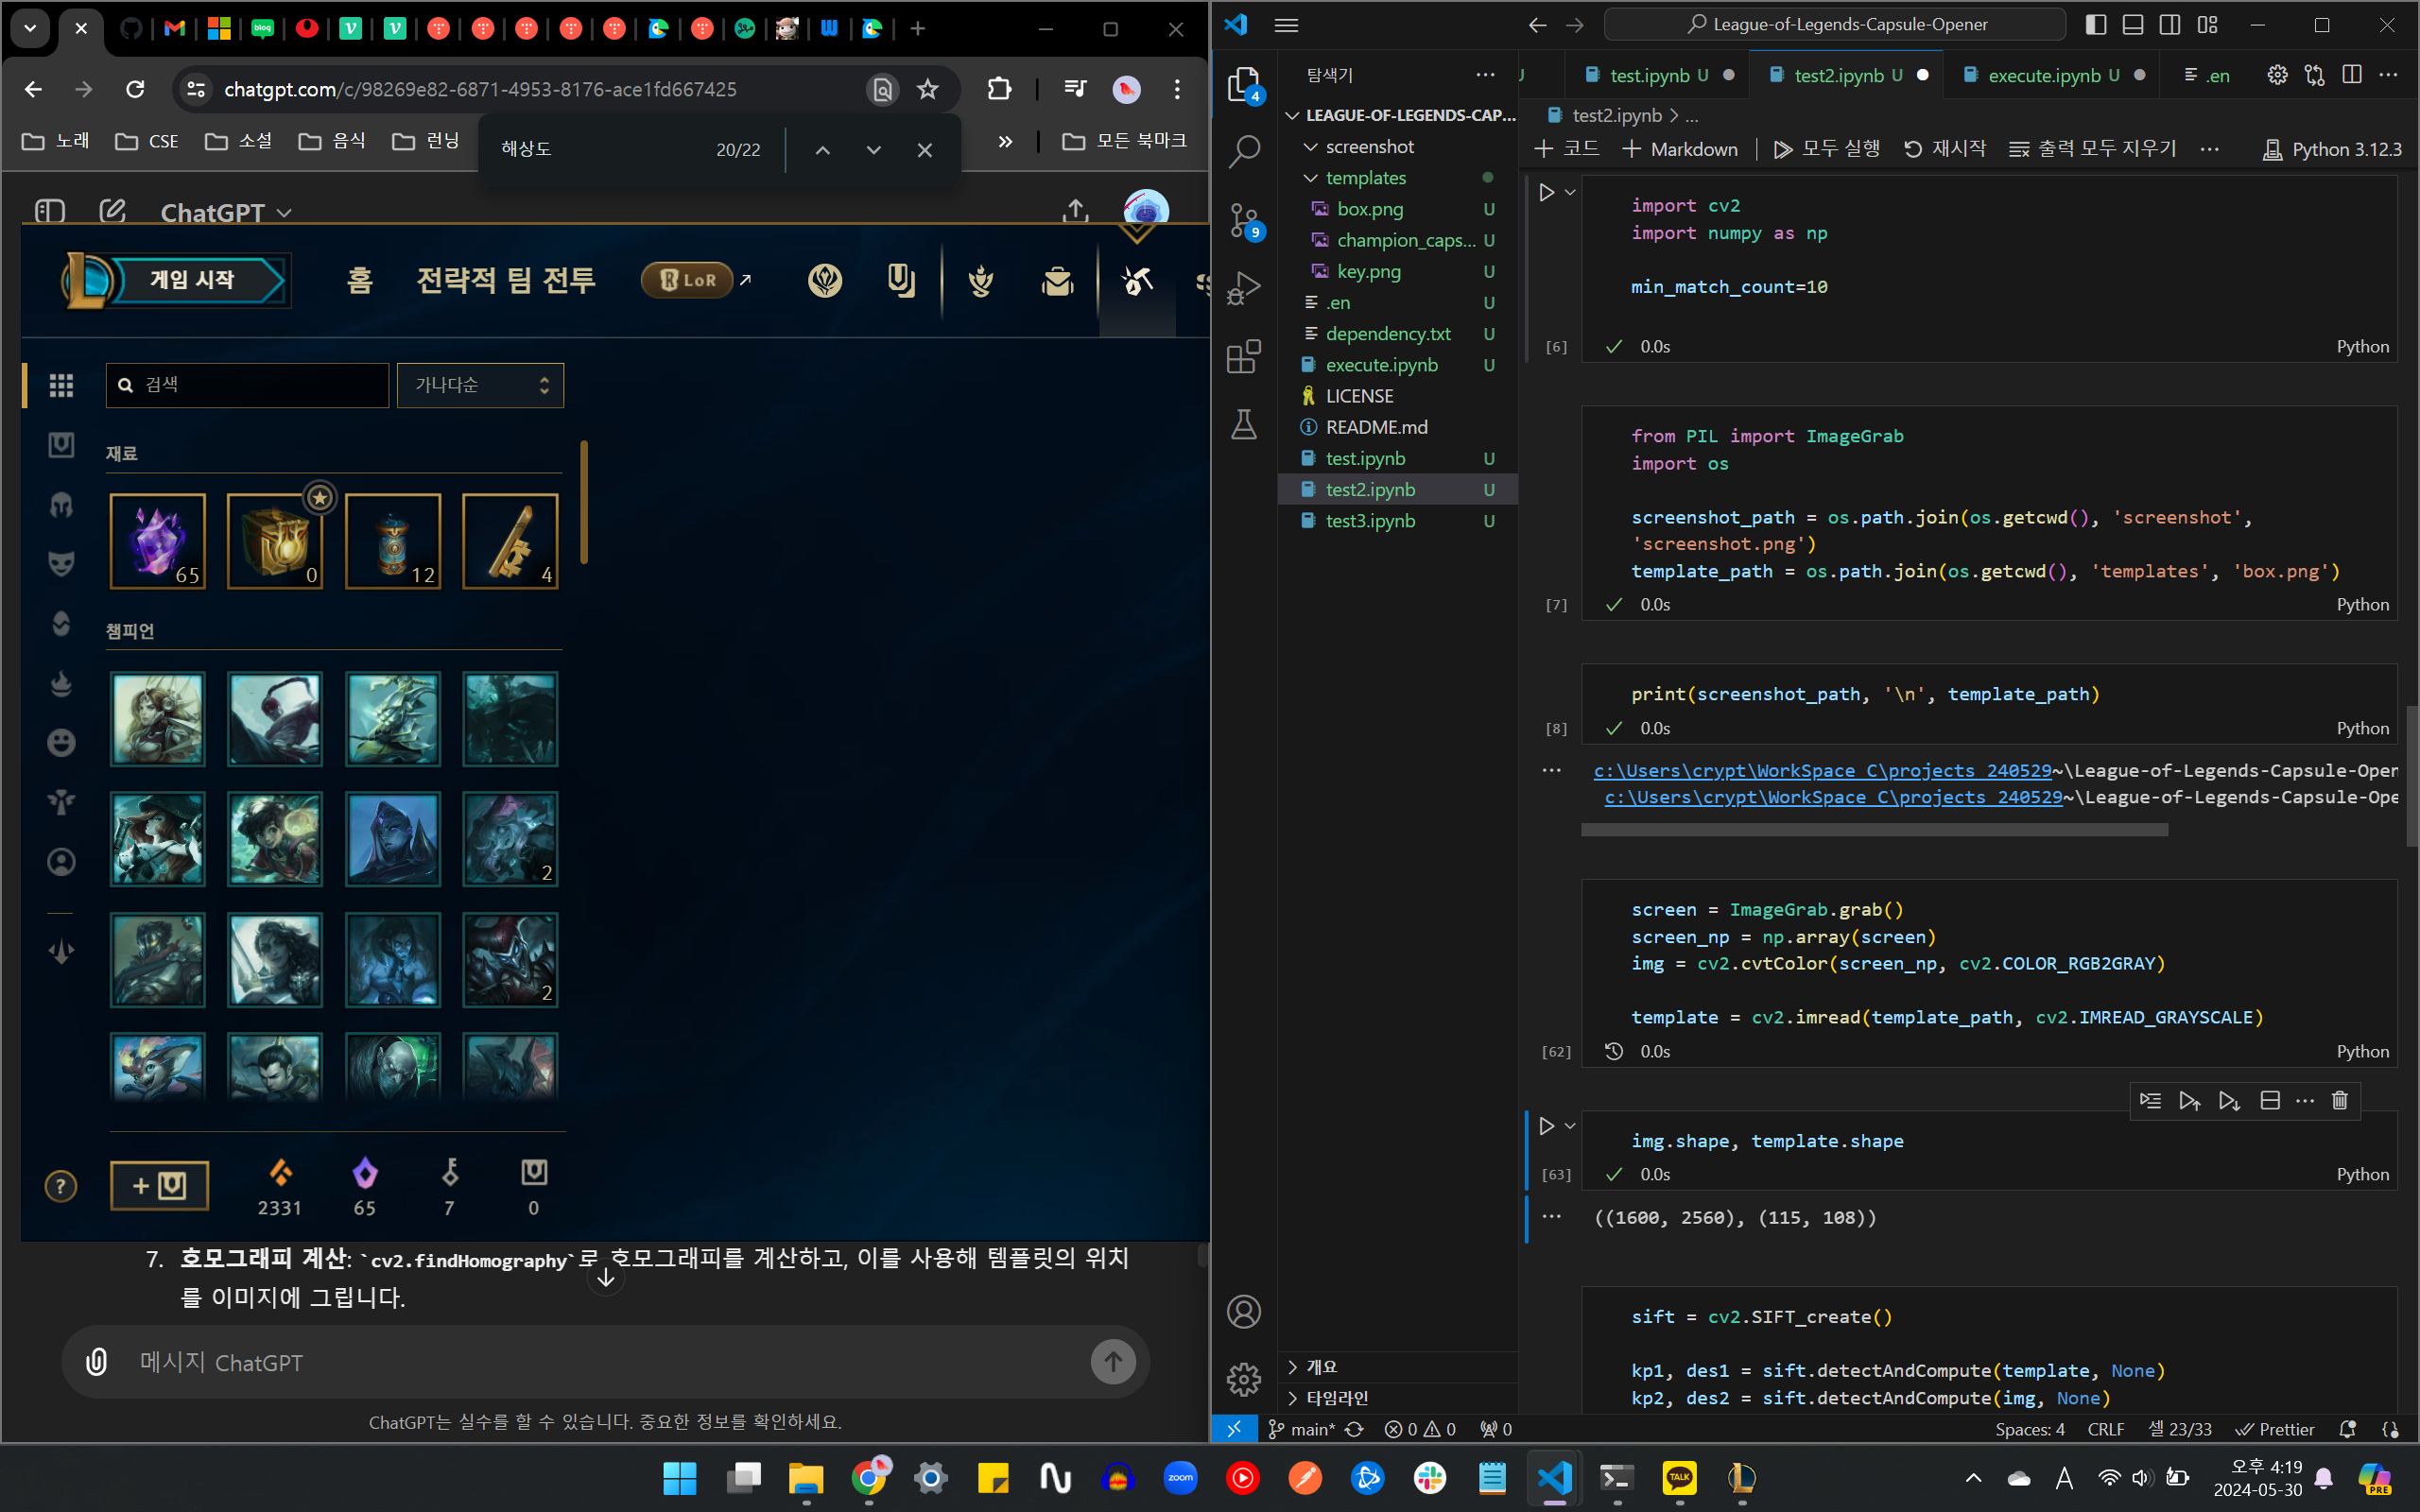

In [11]:
screen

In [12]:
img.shape, template.shape

((1600, 2560), (115, 108))

In [13]:
sift = cv2.SIFT_create()

kp1, des1 = sift.detectAndCompute(template, None)
kp2, des2 = sift.detectAndCompute(img, None)

In [14]:
bf = cv2.BFMatcher(cv2.NORM_L2, crossCheck=True)
matches = bf.match(des1, des2)

In [15]:
matches = sorted(matches, key=lambda x: x.distance)

In [16]:
good_matches = matches[:min_match_count]

In [17]:
if len(good_matches) >= min_match_count:
    # 좋은 매칭 결과로부터 키포인트 좌표 추출
    src_pts = np.float32([kp1[m.queryIdx].pt for m in good_matches]).reshape(-1, 2)
    dst_pts = np.float32([kp2[m.trainIdx].pt for m in good_matches]).reshape(-1, 2)

    # 호모그래피 계산
    M, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC, 5.0)
    matches_mask = mask.ravel().tolist()

    # 템플릿의 모서리 좌표 계산
    h, w = template.shape
    pts = np.float32([[0, 0], [0, h-1], [w-1, h-1], [w-1, 0]]).reshape(-1, 1, 2)
    dst = cv2.perspectiveTransform(pts, M)

    # 이미지에 템플릿 위치 그리기
    img = cv2.polylines(img, [np.int32(dst)], True, 255, 3, cv2.LINE_AA)
else:
    print(f"Not enough matches are found - {len(good_matches)}/{min_match_count}")
    matches_mask = None

In [18]:
draw_params = dict(matchColor=(0, 255, 0), singlePointColor=None, matchesMask=matches_mask, flags=2)
result = cv2.drawMatches(template, kp1, img, kp2, good_matches, None, **draw_params)

In [19]:
result.shape

(1600, 2668, 3)

In [20]:
cv2.imshow("1", result)

: 

In [ ]:


# SIFT 디텍터 생성
sift = cv2.SIFT_create()

# 이미지와 템플릿에서 특징점과 디스크립터 추출
kp1, des1 = sift.detectAndCompute(template, None)
kp2, des2 = sift.detectAndCompute(img, None)

# BF 매처 생성 및 디스크립터 매칭
bf = cv2.BFMatcher(cv2.NORM_L2, crossCheck=True)
matches = bf.match(des1, des2)

# 매칭 결과 정렬
matches = sorted(matches, key=lambda x: x.distance)

# 좋은 매칭 결과 선별
good_matches = matches[:min_match_count]

if len(good_matches) >= min_match_count:
    # 좋은 매칭 결과로부터 키포인트 좌표 추출
    src_pts = np.float32([kp1[m.queryIdx].pt for m in good_matches]).reshape(-1, 2)
    dst_pts = np.float32([kp2[m.trainIdx].pt for m in good_matches]).reshape(-1, 2)

    # 호모그래피 계산
    M, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC, 5.0)
    matches_mask = mask.ravel().tolist()

    # 템플릿의 모서리 좌표 계산
    h, w = template.shape
    pts = np.float32([[0, 0], [0, h-1], [w-1, h-1], [w-1, 0]]).reshape(-1, 1, 2)
    dst = cv2.perspectiveTransform(pts, M)

    # 이미지에 템플릿 위치 그리기
    img = cv2.polylines(img, [np.int32(dst)], True, 255, 3, cv2.LINE_AA)
else:
    print(f"Not enough matches are found - {len(good_matches)}/{min_match_count}")
    matches_mask = None

# 매칭 결과 그리기
draw_params = dict(matchColor=(0, 255, 0), singlePointColor=None, matchesMask=matches_mask, flags=2)
result = cv2.drawMatches(template, kp1, img, kp2, good_matches, None, **draw_params)

result


if __name__ == "__main__":
    # 이미지 경로와 템플릿 경로 설정
    image_path = 'path/to/your/image.jpg'
    template_path = 'path/to/your/template.jpg'

    # 템플릿을 이미지에서 찾기
    result_image = find_template_in_image(image_path, template_path)

    # 결과 출력
    cv2.imshow("Result", result_image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
